In [12]:
from LES_MSCART_reader import *
cpn.setup_figures(plt)

In [13]:
    base_dir='/umbc/xfs1/zzbatmos/users/charaj1/taki/ACRS/LES_MSCART/RICO/'
    band='0p860'
    MSCARThdf='RICO_dharma_005044_b'+band+'_MSCART_SZA120_SAA000_VAA000plus_NPH1e6.hdf5'
    RT=POLCARTdset('LES',base_dir)
    RT.readPOLCARThdf5(MSCARThdf,dpath=base_dir+'results/b'+band+'/')
    RT_field=LES_field(RT.fname.split('_MSCART',1)[0]+'.nc',dpath=base_dir)
    RT_field.readLES_field()

/umbc/xfs1/zzbatmos/common/Codes/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide
/umbc/xfs1/zzbatmos/common/Codes/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide
/umbc/xfs1/zzbatmos/common/Codes/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide


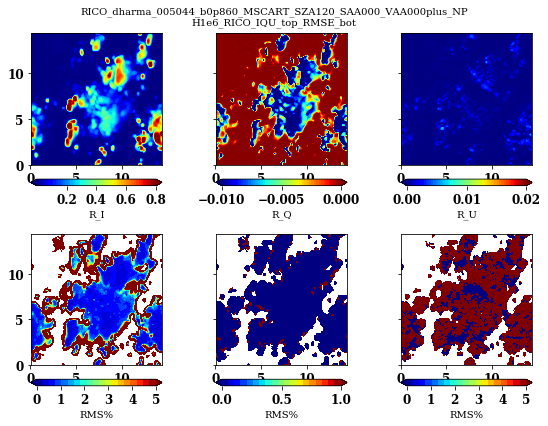

In [17]:
    fig1,ax1=plt.subplots(2,3,figsize=(8,6),subplot_kw={'aspect':'equal'})
    #0p860 120
    vc={'vIR':np.linspace(0.0 ,0.8,50) ,'vQR':np.linspace(-.01,0.00,50)    ,'vUR':np.linspace(0.0,0.02,50) ,\
     'vIe':np.linspace(0.0,5.00,20),'vQe':np.linspace(0,1.0,20)     ,'vUe':np.linspace(0.0,5,20),\
     'cIR':np.arange(0.2,0.81,0.2)  ,'cQR':np.arange(-.01,.001,0.005),'cUR':np.arange(0.0,0.021,0.01),\
     'cIe':np.arange(0,5.1,1) ,'cQe':np.arange(0,1.1,0.5)      ,'cUe':np.arange(0,5.1,1)}     


    xcens=(RT_field.xgrd[1:]+RT_field.xgrd[0:-1])/2
    ycens=(RT_field.ygrd[1:]+RT_field.ygrd[0:-1])/2       
    VZAi=61
    fig1_ttl=RT.fname.split('.',1)[0]+'_RICO_IQU_top_RMSE_bot'

    ctfI=ax1[0,0].contourf(xcens,ycens,RT.MeanPRad[VZAi,:,:,0],vc['vIR'],cmap=plt.cm.jet,extend='both')
    ctfQ=ax1[0,1].contourf(xcens,ycens,RT.MeanPRad[VZAi,:,:,1],vc['vQR'],cmap=plt.cm.jet,extend='both')
    ctfU=ax1[0,2].contourf(xcens,ycens,RT.MeanPRad[VZAi,:,:,2],vc['vUR'],cmap=plt.cm.jet,extend='both')
    cteI=ax1[1,0].contourf(xcens,ycens,RT.RMSEPRad[VZAi,:,:,0]/RT.MeanPRad[VZAi,:,:,0]*100,vc['vIe'],cmap=plt.cm.jet,extend='both')
    cteQ=ax1[1,1].contourf(xcens,ycens,RT.RMSEPRad[VZAi,:,:,1]/RT.MeanPRad[VZAi,:,:,1]*100,vc['vQe'],cmap=plt.cm.jet,extend='both')
    cteU=ax1[1,2].contourf(xcens,ycens,RT.RMSEPRad[VZAi,:,:,2]/RT.MeanPRad[VZAi,:,:,2]*100,vc['vUe'],cmap=plt.cm.jet,extend='both')

    ax1[0,1].tick_params(labelleft=False)
    ax1[0,2].tick_params(labelleft=False)
    ax1[1,1].tick_params(labelleft=False)
    ax1[1,2].tick_params(labelleft=False)
    
    iqu_cb(fig1,ctfI,ax1[0,0],ticks=vc['cIR'],label='R_I')
    iqu_cb(fig1,ctfQ,ax1[0,1],ticks=vc['cQR'],label='R_Q')
    iqu_cb(fig1,ctfU,ax1[0,2],ticks=vc['cUR'],label='R_U')
    iqu_cb(fig1,cteI,ax1[1,0],ticks=vc['cIe'],label='RMS%')
    iqu_cb(fig1,cteQ,ax1[1,1],ticks=vc['cQe'],label='RMS%')
    iqu_cb(fig1,cteU,ax1[1,2],ticks=vc['cUe'],label='RMS%')
    fig1.suptitle("\n".join(wrap(fig1_ttl,60)),size=10)   
    fig1.tight_layout(rect=[0,0,1,0.95])

# Reading LES results with multiple VAA

In [1]:
from cpnLES_MSCARTlib import POLCARTdset
case=POLCARTdset('LES','/umbc/xfs1/zzbatmos/users/charaj1/taki/ACRS/LES_MSCART/RICO/')
case.readMSCARTmulVAA('RICO_dharma_005044_b0p860_MSCART_SZA120_SAA000_Nvaa004_NPH1e6.nc',fdpath='results/b0p860/')

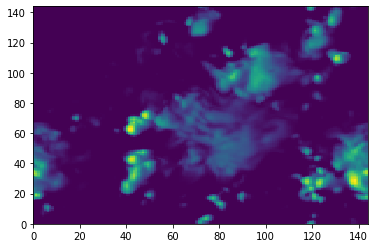

In [4]:
import matplotlib.pyplot as plt
plt.pcolormesh(case.MeanPRad[0,0,:,:,0])